In [1]:
from matplotlib import pyplot

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

from src.segment import egg_contours
from src.load import load_image
from src.fit_ellipses import fit_ellipses

# If we are using PyCharm dark mode, the image will be inverted unless we do this
pyplot.style.use('dark_background')

- Use Pandas to load the CSV that contains our URLs for each images
- The only information we need right now is the URL of image, so we grab that column
- Use our helper function to get the image from URL and open a CV2 representation of this

In [2]:
data = pd.read_csv('./data/California_Egg_Data.csv')

In [47]:
data.dtypes

IMAGE                             object
IMAGE URL                         object
GUID                              object
SCIENTIFIC_NAME                   object
COUNTRY                           object
STATE_PROV                        object
SPEC_LOCALITY                     object
VERBATIM_DATE                     object
DEC_LAT                          float64
DEC_LONG                         float64
COORDINATEUNCERTAINTYINMETERS    float64
dtype: object

In [48]:
stats = dict()

In [49]:
for idx, row in data.iterrows():
    if row["SCIENTIFIC_NAME"] not in stats:
        stats[row["SCIENTIFIC_NAME"]] = []

    img = load_image(row["IMAGE URL"])

    contour_list = egg_contours(img)
    stats[row["SCIENTIFIC_NAME"]].append(len(contour_list))

In [54]:
# Only run this if you want to save the data from above
# import json
# with open('stats.json', 'w') as fp:
#     json.dump(stats, fp)

In [8]:
averages = []
lengths = []

In [9]:
for key in stats:
    averages.append(np.average(stats[key]))
    lengths.append(len(stats[key]))

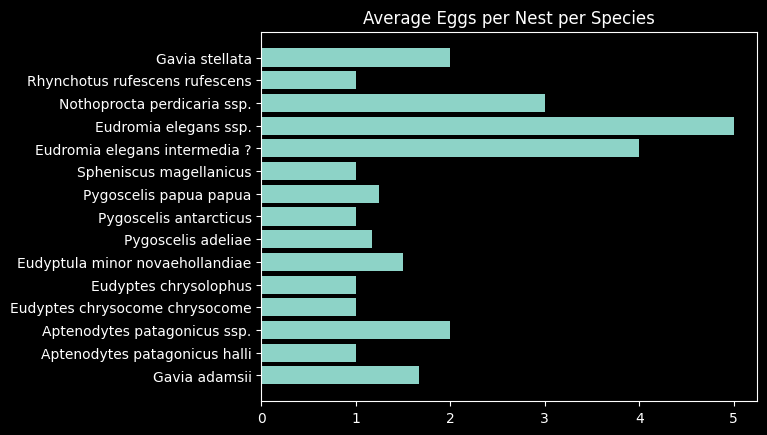

In [11]:
plt.barh(list(stats.keys())[10:25], averages[10:25])
plt.figure(1, [5, 20]) # this line moved and figure size changed to suit data
plt.tick_params(axis='both', which='minor', labelsize=1)
plt.title("Average Eggs per Nest per Species")
plt.show()

In [2]:
import json

In [5]:
with open('./data/stats.json', 'r') as fp:
    stats = json.load(fp)

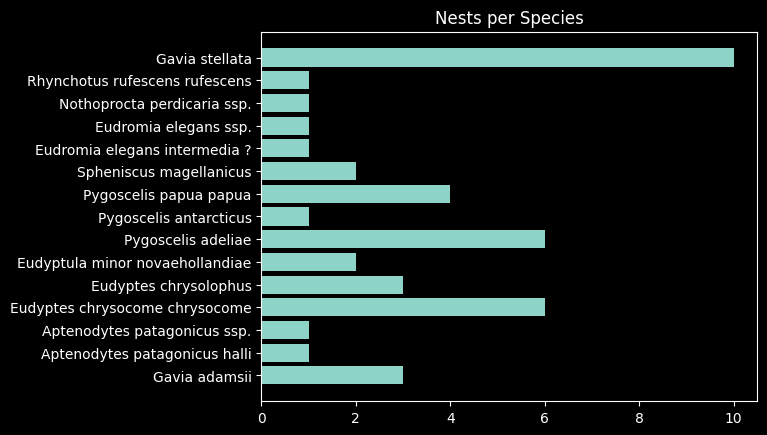

In [12]:
plt.barh(list(stats.keys())[10:25], lengths[10:25])
plt.figure(1, [5, 20]) # this line moved and figure size changed to suit data
plt.tick_params(axis='both', which='minor', labelsize=1)
plt.title("Nests per Species")
plt.show()

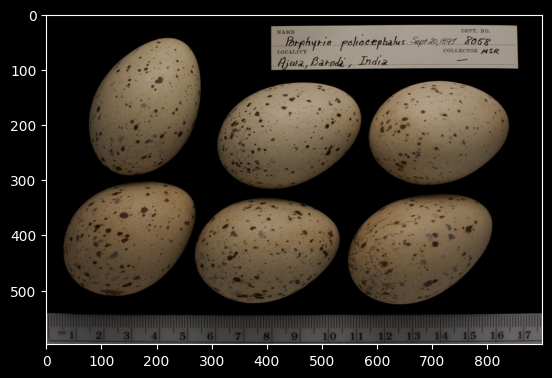

In [20]:
img = load_image(data["IMAGE URL"][2000])
plt.imshow(img)

In [21]:
contours = egg_contours(img)

In [22]:
t = fit_ellipses(contours, len(contours))

In [23]:
t

[((396.6406555175781, 425.7126770019531),
  (186.02842712402344, 262.0675354003906),
  79.5663070678711),
 ((675.7100830078125, 421.6982727050781),
  (184.68692016601562, 273.0939025878906),
  65.63752746582031),
 ((148.56593322753906, 403.4752197265625),
  (189.69204711914062, 254.6272735595703),
  57.41336441040039),
 ((438.385009765625, 216.9259490966797),
  (182.73301696777344, 267.861083984375),
  70.73796844482422),
 ((709.3226318359375, 213.70030212402344),
  (184.67623901367188, 253.42323303222656),
  81.0126953125),
 ((181.4054412841797, 168.83970642089844),
  (184.62269592285156, 262.9062805175781),
  28.942420959472656)]

In [24]:
r = img.copy()

In [25]:
x = cv2.ellipse(r, t[0], (0, 255, 0), 3)

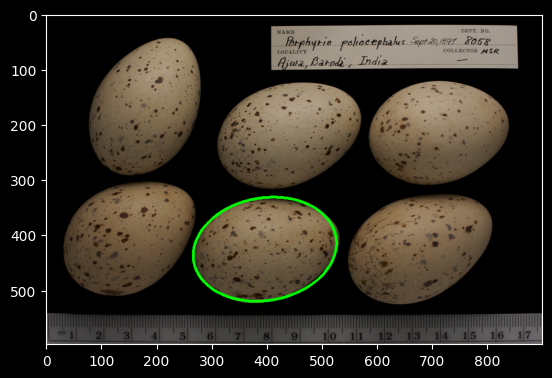

In [26]:
plt.imshow(x)

In [27]:
(xc,yc),(d1,d2),angle = t[0]

In [28]:
import math

In [29]:
rmajor = max(d1,d2)/2
if angle > 90:
    angle = angle - 90
else:
    angle = angle + 90
print(angle)
xtop = xc + math.cos(math.radians(angle))*rmajor
ytop = yc + math.sin(math.radians(angle))*rmajor
xbot = xc + math.cos(math.radians(angle+180))*rmajor
ybot = yc + math.sin(math.radians(angle+180))*rmajor
x = cv2.line(r, (int(xtop),int(ytop)), (int(xbot),int(ybot)), (0, 0, 255), 3)

169.5663070678711


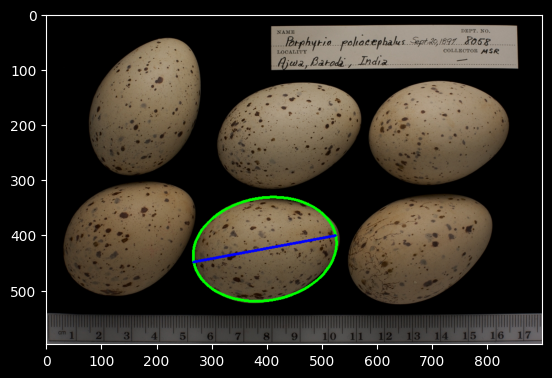

In [30]:
plt.imshow(x)